In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [131]:
df = pd.read_csv("weatherHistory.csv" , encoding="latin1")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [132]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

In [133]:
df['MostDaysOfTheYear'] = df['Formatted Date'].map(lambda date: 0*date.year + 30*date.month + date.day)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,MostDaysOfTheYear
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,121
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,121
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,121
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,121
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,121


In [134]:
Average_temperature = df.groupby(['MostDaysOfTheYear'])['Temperature (C)'].mean().reset_index() 


Average_temperature

,MostDaysOfTheYear,Temperature (C)
0,31,-1.211048
1,32,-0.310606
2,33,-0.437689
3,34,-0.755240
4,35,0.451999
...,...,...
355,387,0.011427
356,388,-0.752946
357,389,-1.272896
358,390,-1.491793


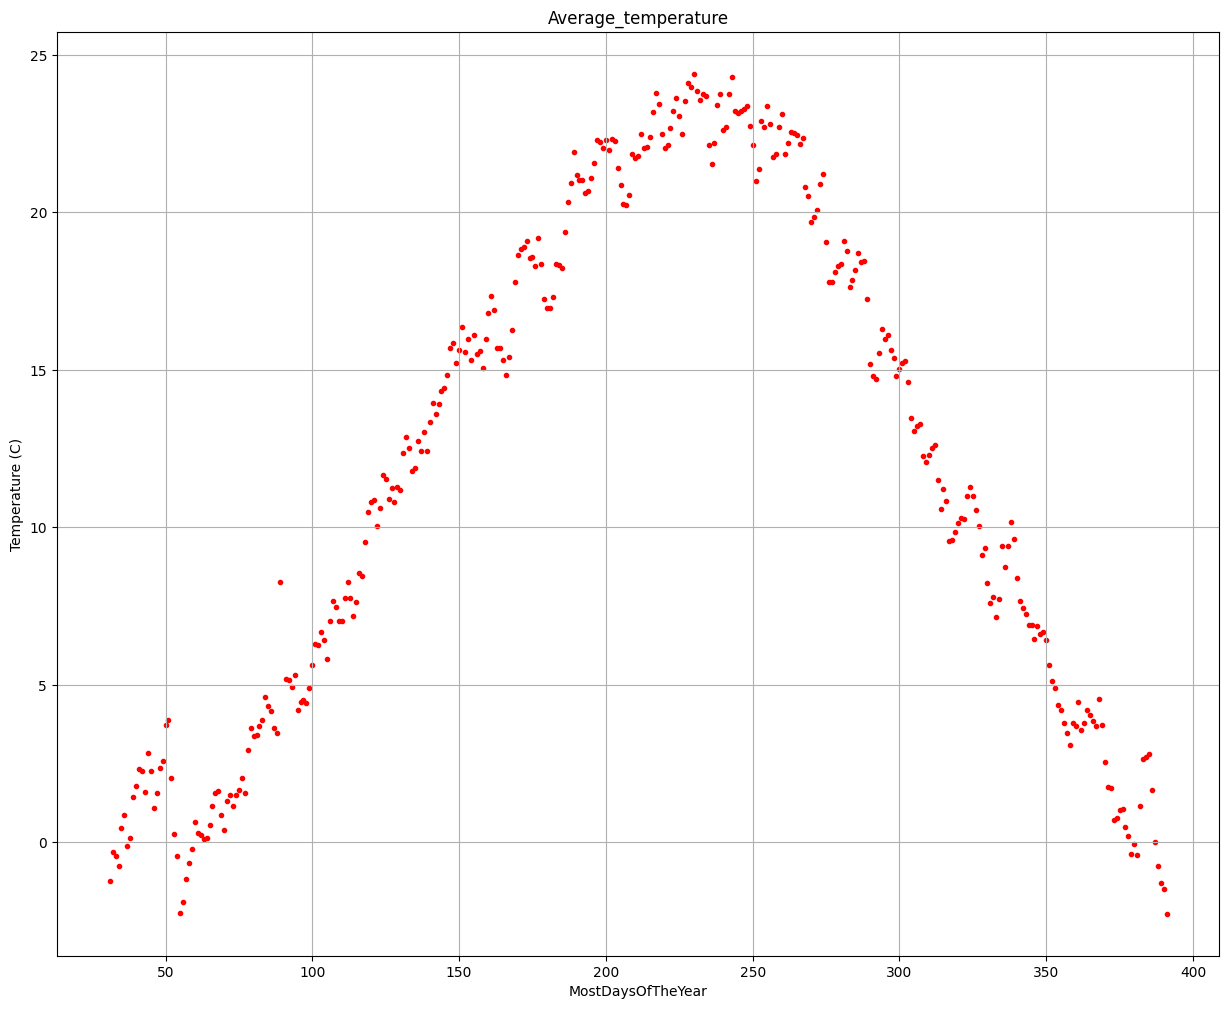

In [135]:
plt.figure(figsize=(15, 12))  
plt.title("Average_temperature")
plt.xlabel("MostDaysOfTheYear")
plt.ylabel("Temperature (C)")
plt.scatter(Average_temperature['MostDaysOfTheYear'], Average_temperature['Temperature (C)'], marker='.',c='red')  
plt.grid()
plt.show()


In [136]:
X = df['MostDaysOfTheYear'].values # چندمین روز سال
Y = df['Temperature (C)'].values  # دمای هوا(سانتیگراد)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((86807,), (9646,), (86807,), (9646,))

In [149]:
class Perceptron:
    def __init__(self, learning_rate): 
        self.learning_rate = learning_rate
        self.weights = np.random.rand(1) 
        self.bias = np.random.rand(1)  
        
    def activation(self, x, function):
        if function == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif function == 'relu':
            return np.maximum(0, x)
        elif function == 'tanh':
            return np.tanh(x)
        elif function == 'linear':
            return x
        else:
            raise Exception ('Unknown activation function')        

    def fit(self, X_train, Y_train, epochs):
        for epoch in tqdm(range(epochs)):
            for x, y in zip(X_train, Y_train):
                #forwarding
                y_pred = x * self.weights + self.bias
                y_pred = self.activation(y_pred, 'tanh')

                #back propagation
                error = y - y_pred

                #updating  #SGD
                self.weights += self.learning_rate * error * x
                self.bias += self.learning_rate * error



    def predict(self,  X_test):
        Y_pred = []
        for x_test in X_test:
            y_pred = x_test * self.weights + self.bias
            y_pred = self.activation(y_pred, 'tanh')
            Y_pred.append(y_pred)
        return np.array(Y_pred)   

    def predict2(self,  x_test):
            y_pred = x_test * self.weights + self.bias
            y_pred = self.activation(y_pred, 'linear')
            return np.array(Y_pred)   


    def calculate_loss(self, X_test, Y_test, metric):
        Y_pred = self.predict(X_test)
        if metric == 'mse':
            return np.mean(np.square(Y_test - Y_pred))
        elif metric == 'mae':
            return np.mean(np.abs(Y_test - Y_pred))
        elif metric == 'rmse':
            return np.sqrt(np.mean(np.square(Y_test - Y_pred)))
        else:
            raise Exception ('Unknown metric')   

    def calculate_accuarcy(self,X_test, Y_test):
        Y_pred = self.predict(X_test)
        Y_pred = Y_pred.reshape(-1)
        accuarcy = np.sum(Y_pred == Y_test) / len(Y_test)
        return accuarcy    
        

    def evaluate(self, X_test, Y_test):
        loss = self.calculate_loss(X_test, Y_test, 'mae')
        accuracy = self.calculate_accuarcy(X_test, Y_test)

        return loss, accuracy    
       

In [141]:
model = Perceptron(learning_rate=0.001) 
model.fit(X_train, Y_train, epochs=50)

100%|██████████| 50/50 [00:55<00:00,  1.11s/it]


In [155]:
plot = model.evaluate(X_test, Y_test)
plot[0]

11.896413596885283

In [159]:
Temperature_pred = model.predict2(120)
Temperature_pred[0]

1.0